# House Price Prediction Project

In [ ]:
import os #os is a python built in library used to interact with the Operating System. Helps access directories,files and folders
for dirname, _, filenames in os.walk('/kaggle/input'): #os returns dirname,subdirectories,filenames. Ignore subdirectories using '_'.
  for filename in filenames: #if the required filename is in filenames
    print(os.path.join(dirname, filename)) #join the dirname and filename; eg. /kaggle/input/datasets

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #patches are used to provide shapes in plots [contains a list of elements and their names - box : called Legend]
import matplotlib.gridspec as gridspec #gridspec is the subplot layout
from scipy import stats #imports statistics
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
import warnings
warnings.simplefilter(action='ignore') #warnings module contains simplefilter that tells the module how to handle warnings; One of its actions being 'Ignore'.

In [ ]:
from sklearn.metrics import mean_squared_error #sklearn.metrics: model evaluation tools; MSE : Measures average squared difference between: True values, Predicted values
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold #sklearn.model_selection: controls how data is split and models are validated
#train_test_split : splits dataset into train and test dataset
# GridSearchCV is used for Hyperparametertuning using Exhaustive search
#RandomizedSearchCV is used to fasten Hyperparameter tuning
#cross_val_score used to cross validate
#KFold is used to control cross validation
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
test_id = test['Id']
print(test_id)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64


In [ ]:
df = train # Re-assign df to train for consistency in early EDA visualizations
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.drop(['Id'],axis=1,inplace=True, errors = 'ignore')
test.drop(['Id'],axis=1,inplace=True, errors = 'ignore')
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print(f'Number of rows and number of columns in the train dataset are {train.shape[0], train.shape[1]}')
print(f'Number of rows and number of columns in the test dataset are {test.shape[0],test.shape[1]}')

Number of rows and number of columns in the train dataset are (1460, 80)
Number of rows and number of columns in the test dataset are (1459, 79)


**SalePrice Feature Analysis**

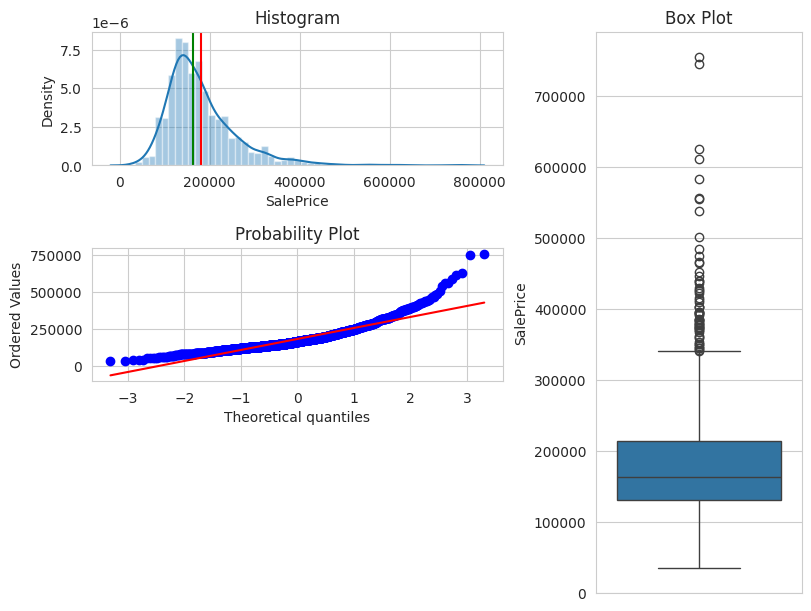

In [ ]:
def three_chart_plot(df,feature):
  fig = plt.figure(constrained_layout=True,figsize=(8,6)) #constrained_layout=True → auto-adjust spacing (no overlaps)
  grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure=fig) #Divides the figure into a 3×3 grid; Allows precise placement of subplots

  ax1 = fig.add_subplot(grid[0,:2])
  ax1.set_title('Histogram')

  sns.distplot(df.loc[:,feature], norm_hist =  True, ax = ax1)
  plt.axvline(x = df[feature].mean(), c = 'red')
  plt.axvline(x = df[feature].median(), c = 'green')

  ax2 = fig.add_subplot(grid[1,:2])
  ax2.set_title('Q-Q Plot')
  stats.probplot(df[feature], plot = ax2)

  ax3 = fig.add_subplot(grid[:,2])
  ax3.set_title('Box Plot')
  sns.boxplot(df[feature], orient = 'v', ax = ax3)
three_chart_plot(df,'SalePrice')

**SKEW**

In [ ]:
from scipy.stats import skew #Skew is used to find the symmetry of data distribution
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


**NULL values**

<Axes: >

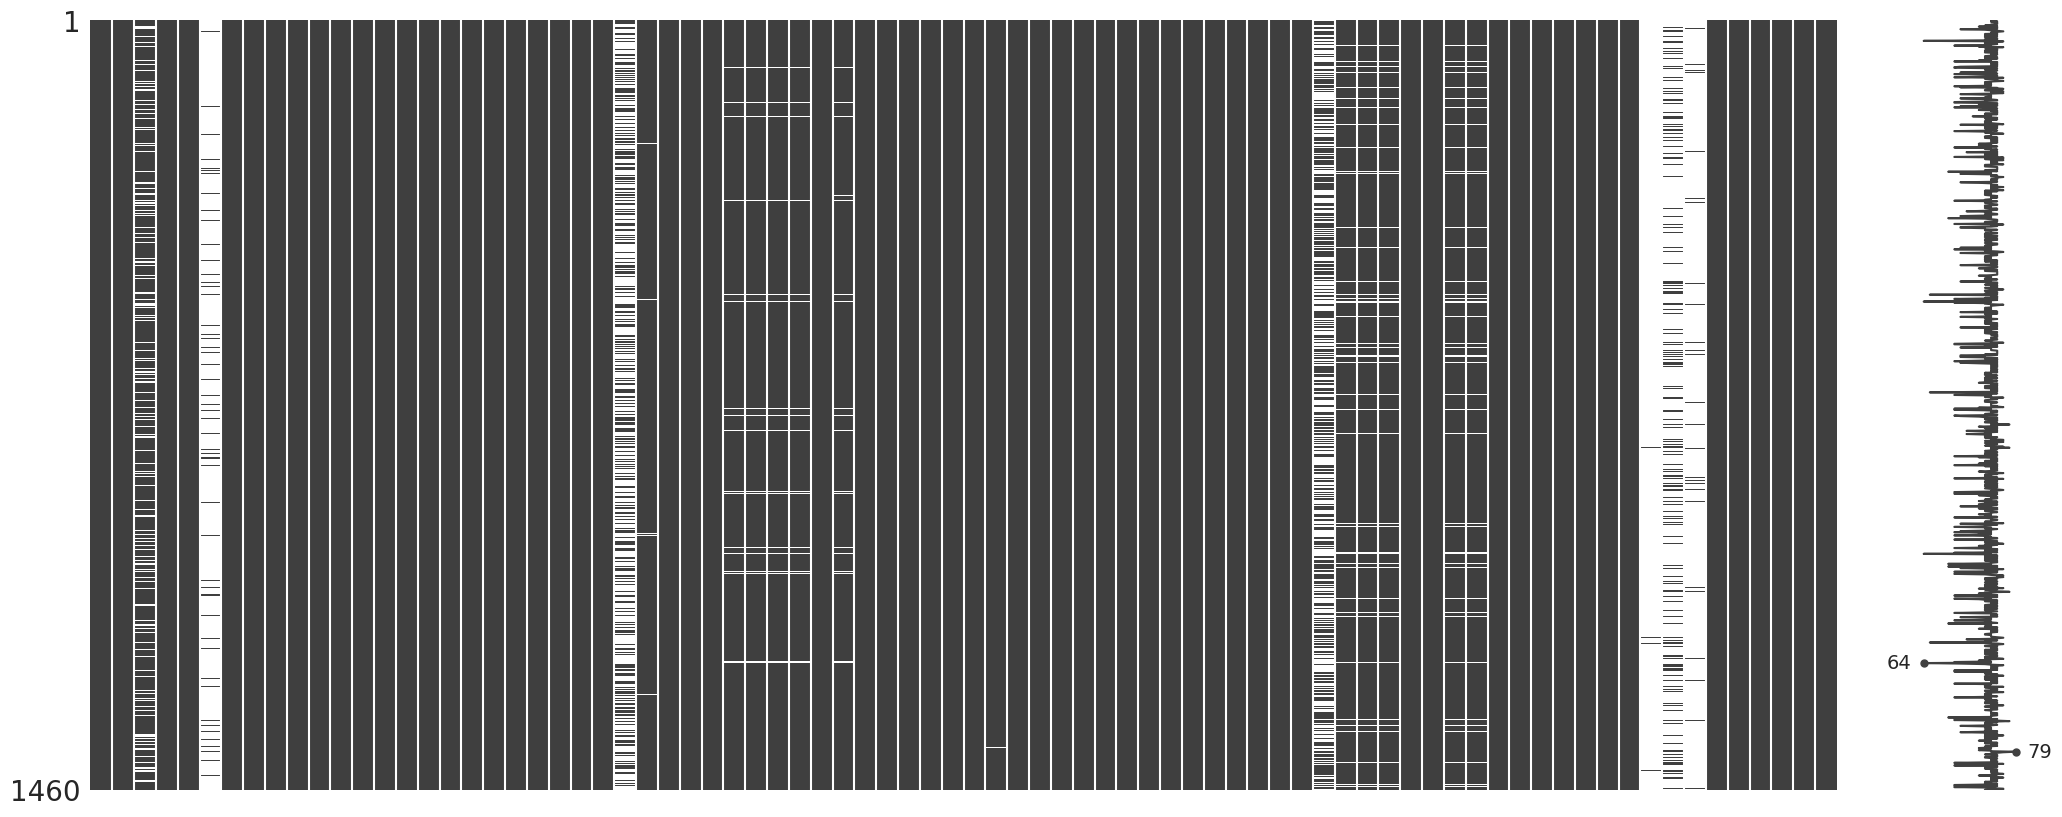

In [ ]:
#missingno helps us to visualize the number of Null values present in each feature
import missingno as msno
%matplotlib inline
msno.matrix(train)

<Axes: >

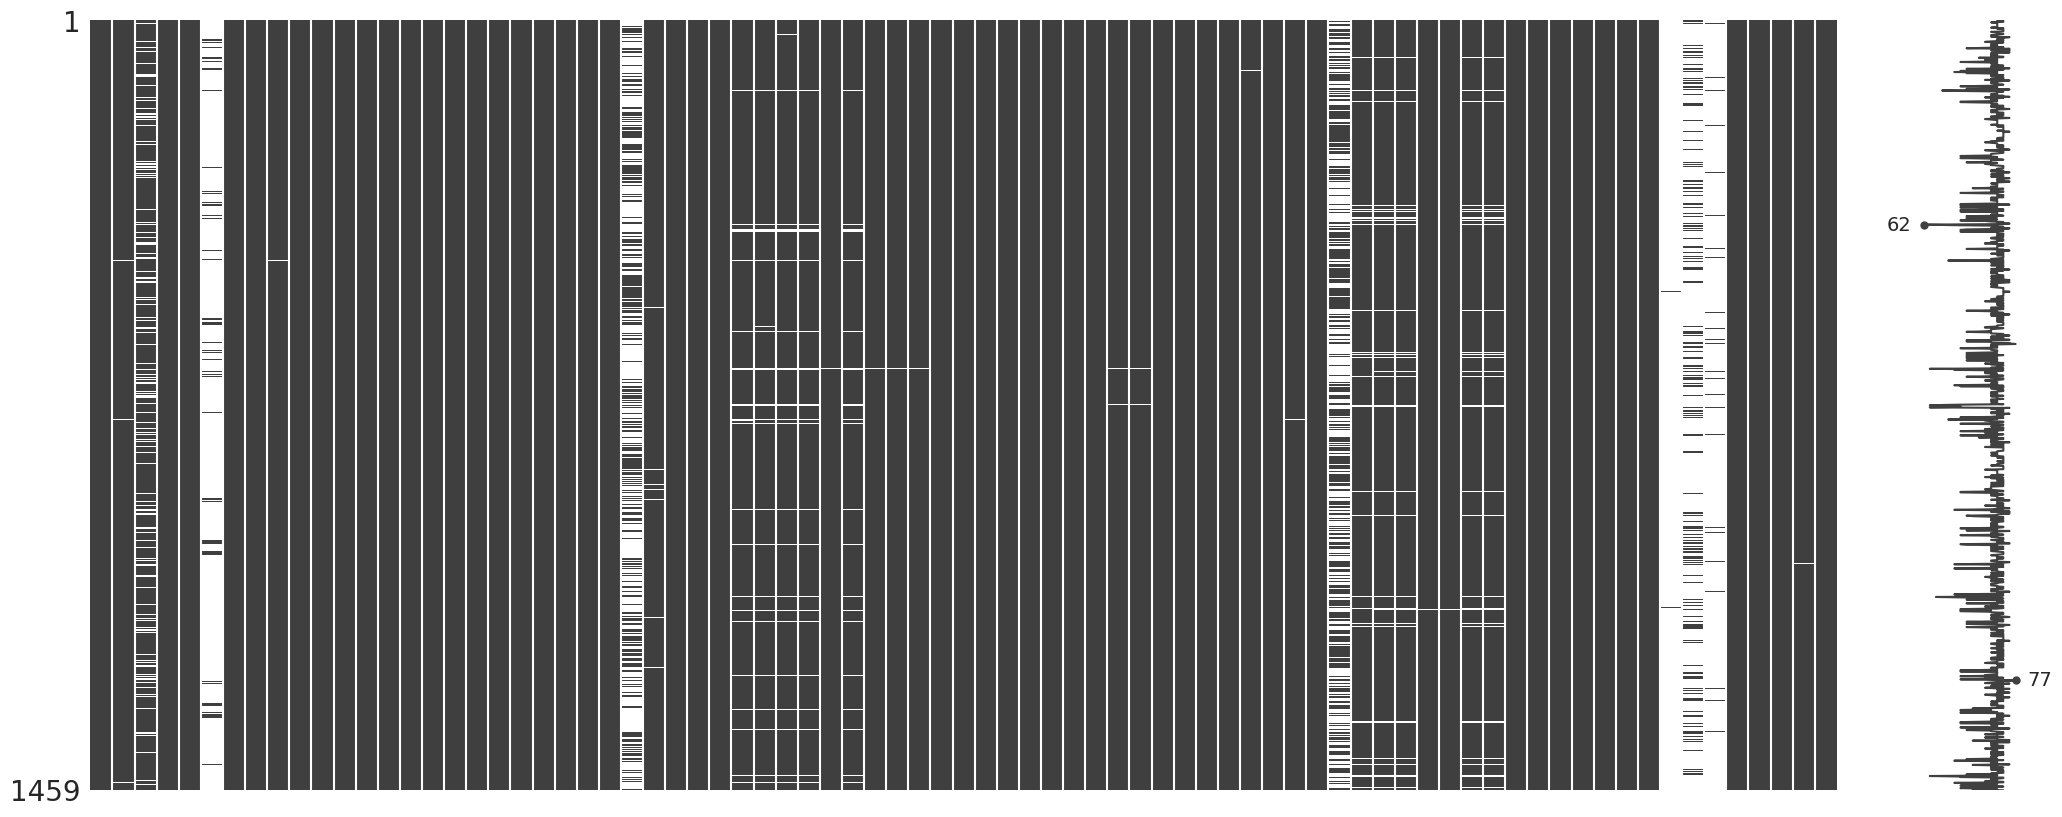

In [ ]:
msno.matrix(test)

In [ ]:
def null_table(data):
  """
    A function which returns the number and percentage of null values in the given dataset.

  """
  indices  = data.isnull().sum().index
  values = data.isnull().sum().values
  percentages = []

  for i in indices :
    percentages.append((data[i].isnull().sum()/data[i].shape[0])*100)
  d = {
      'Columns': indices,
      'Count of null values':values,
      'Percentage of null values' : percentages}

  null_frame=pd.DataFrame(data=d)
  return null_frame

In [ ]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Percentage of null values').tail(10)

,Columns,Count of null values,Percentage of null values
59,GarageFinish,81,5.547945
62,GarageQual,81,5.547945
58,GarageYrBlt,81,5.547945
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
24,MasVnrType,872,59.726027
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [ ]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Percentage of null values').tail(10)

,Columns,Count of null values,Percentage of null values
63,GarageCond,78,5.346127
59,GarageFinish,78,5.346127
62,GarageQual,78,5.346127
2,LotFrontage,227,15.558602
56,FireplaceQu,730,50.034270
24,MasVnrType,894,61.274846
72,Fence,1169,80.123372
5,Alley,1352,92.666210
73,MiscFeature,1408,96.504455
71,PoolQC,1456,99.794380


In [ ]:
na = train.shape[0]
nb = test.shape[0]

y_train = train['SalePrice'].to_frame()
#combine train and test sets
total = pd.concat((train,test),sort=False).reset_index(drop=True)
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f'Total size : {total.shape}')

Total size : (2919, 79)


In [ ]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 10):

  plt.figure(figsize=(width,height))
  percentage = (data.isnull().mean()*100)
  percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
  plt.axhline(y=thresh,color='r',linestyle='-')

  plt.title('Missing values percentage per column')

  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, (f'Columns with more than {thresh}% missing values'), fontsize = 10, color = 'crimson', ha = 'left', va = 'top')
  plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, (f'Columns with less than {thresh}% missing values'), fontsize = 10, color = 'blue', ha = 'left', va = 'top')

  plt.xlabel('Columns')
  plt.ylabel('Missing Percentage Values')
  plt.yticks(weight='bold')

  return plt.show()

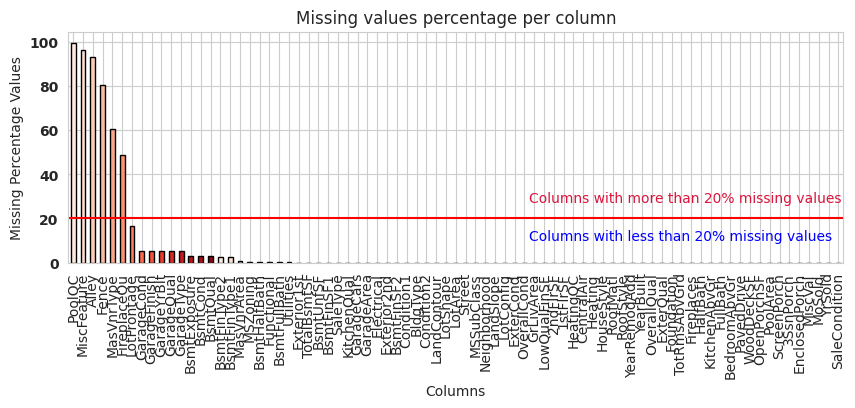

In [ ]:
msv_1(total, 20, color = sns.color_palette('Reds', 15))

**Numerical and Categorical Variables**

In [ ]:
category_var = df.select_dtypes(include='object')
num_var = df.select_dtypes(exclude = 'object')

print('Number of categorical features are : ', category_var.shape[1])
print('Number of numerical features are : ', num_var.shape[1])

Number of categorical features are :  43
Number of numerical features are :  37


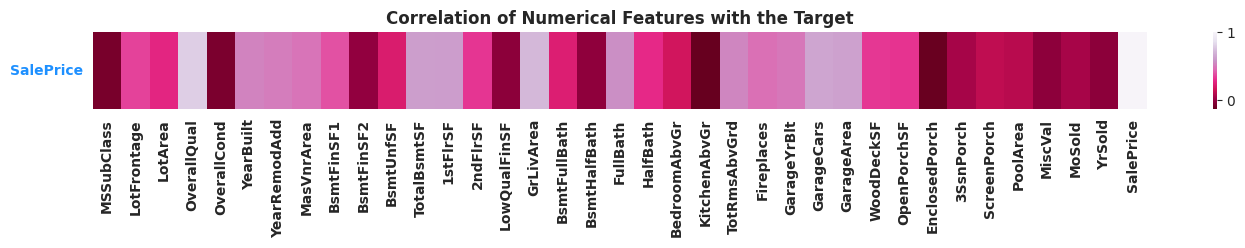

In [ ]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr() #correlaion one row of numerical variable with SalePrice

f, ax = plt.subplots(figsize = (17,1)) #1 for just 1 row

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap = 'PuRd_r')

plt.title('Correlation of Numerical Features with the Target', fontsize = 12, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)
plt.show()

In [ ]:
correlation = num.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10) # correlation each column with SalePrice

cmap = sns.light_palette('cyan', as_cmap = True)

s = correlation.style.background_gradient(cmap=cmap)

s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


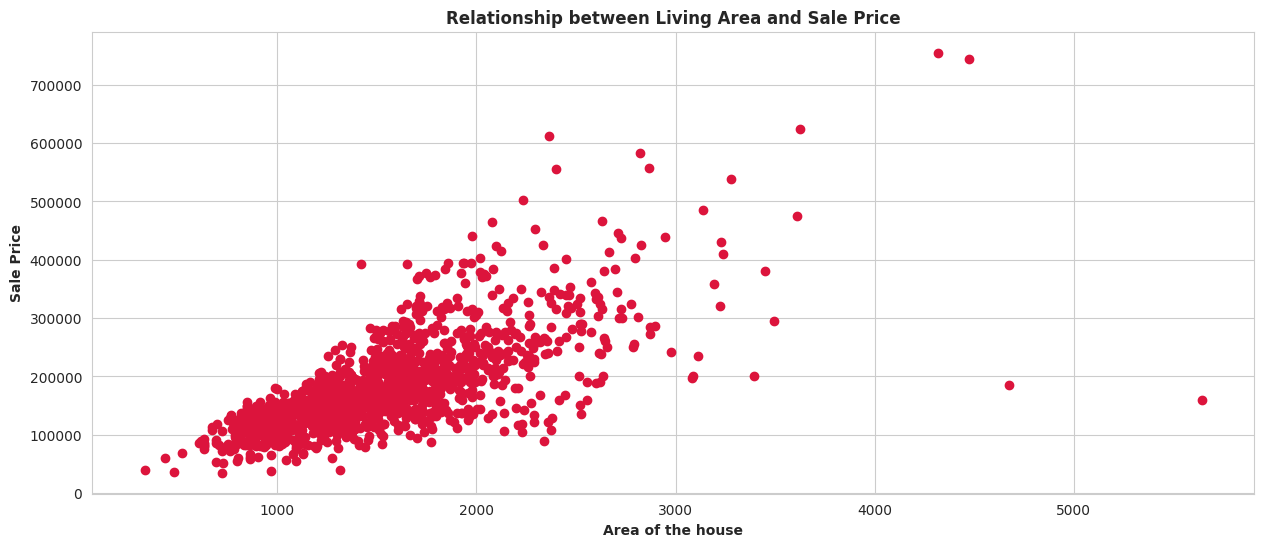

In [ ]:
#Examine the relationship between GrLivArea and the SalePrice
plt.figure(figsize = (15,6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color = 'crimson', alpha = 1)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold')
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

We can observe that there is almost a linear relationship between Living Area and the Sale Price. If the area is huge then price should also have also been high but the two rightmost points suggest something else. These two points are outliers. We will drop both of them below.

In [ ]:
train = train[train['GrLivArea']< 4500]
df = train # Update df after outlier removal

Text(0.5, 1.0, 'Relationship between Living Area and Sale Price')

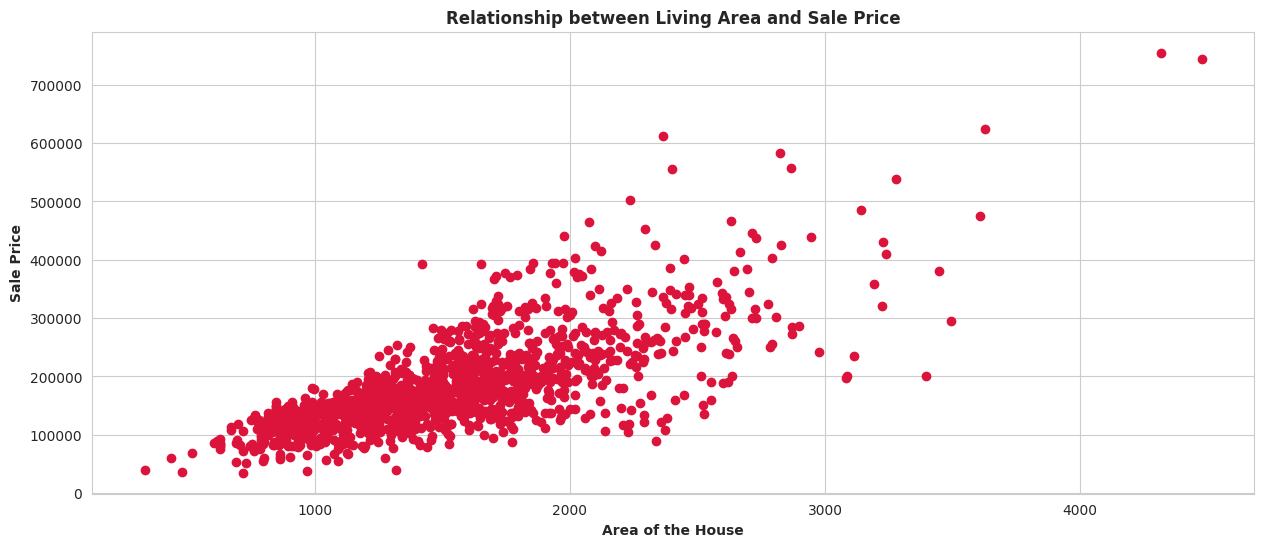

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data=df, color = 'crimson', alpha = 1)
plt.xlabel('Area of the House', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.title('Relationship between Living Area and Sale Price', weight = 'bold')

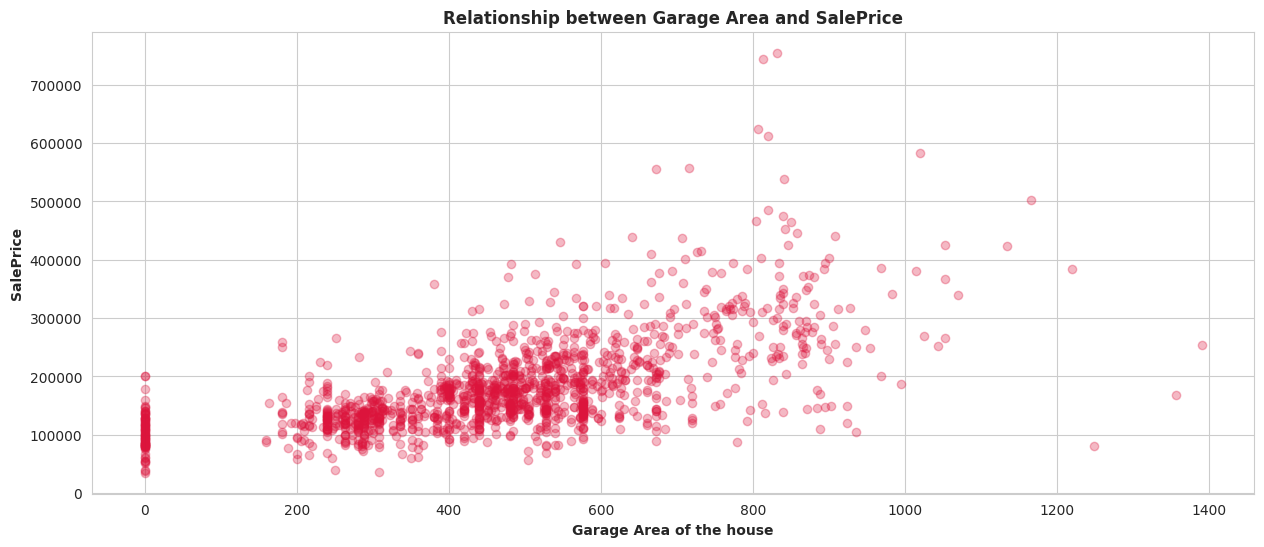

In [ ]:
#Garage Area
plt.figure(figsize = (15,6))
plt.title('Relationship between Garage Area and SalePrice', weight = 'bold')
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.3)
plt.xlabel('Garage Area of the house', weight = 'bold')
plt.ylabel('SalePrice', weight = 'bold')
plt.show()

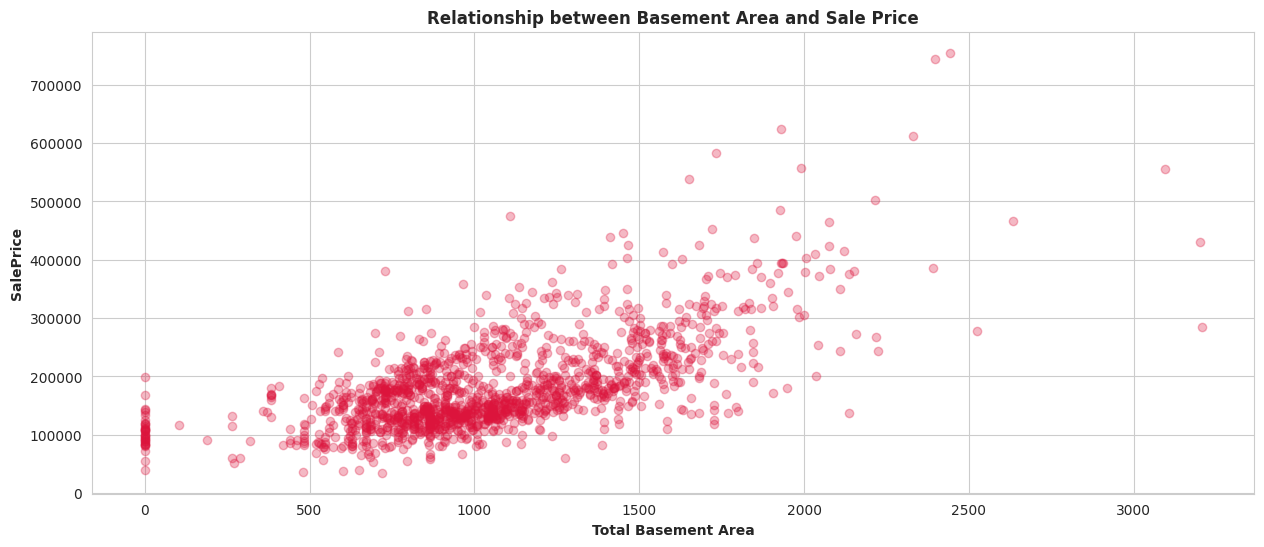

In [ ]:
#Total BAsement ARea
plt.figure(figsize = (15,6))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.3)
plt.title('Relationship between Basement Area and Sale Price', weight = 'bold')
plt.xlabel('Total Basement Area', weight = 'bold')
plt.ylabel('SalePrice', weight = 'bold')
plt.show()

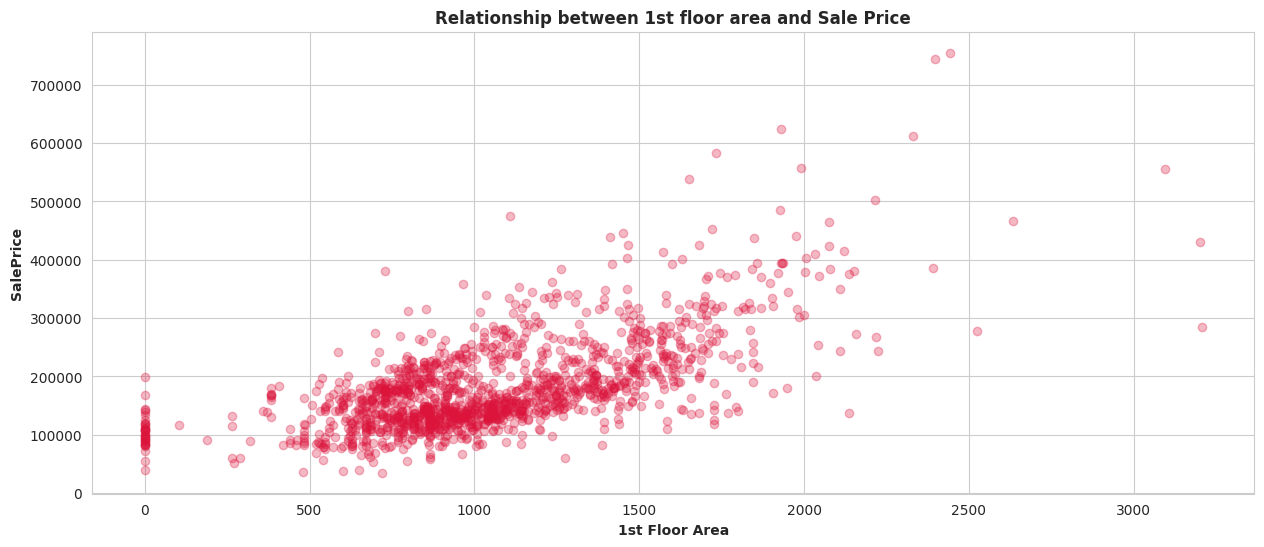

In [ ]:
#1st Floor Area
plt.figure(figsize = (15,6))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.3)
plt.title('Relationship between 1st floor area and Sale Price', weight = 'bold')
plt.xlabel('1st Floor Area', weight = 'bold')
plt.ylabel('SalePrice', weight = 'bold')
plt.show()

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

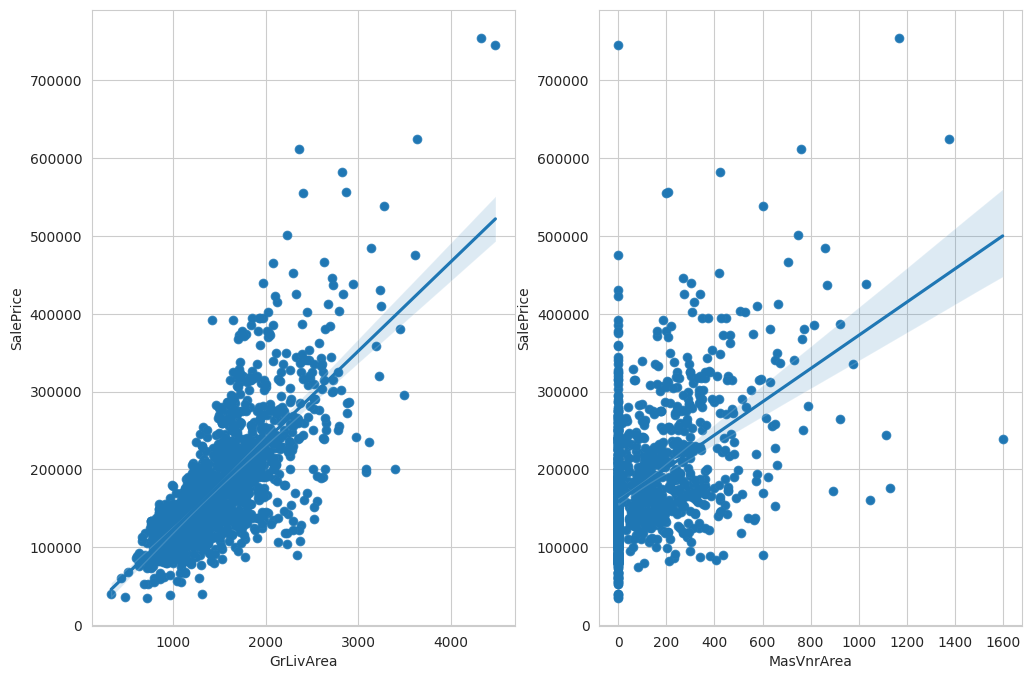

In [ ]:
#Linearity check
fig, (ax1,ax2) = plt.subplots(figsize = (12,8), ncols = 2 ,sharey = False)
#scatterplot
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'], y = df['SalePrice'], ax = ax2)
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax = ax2)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

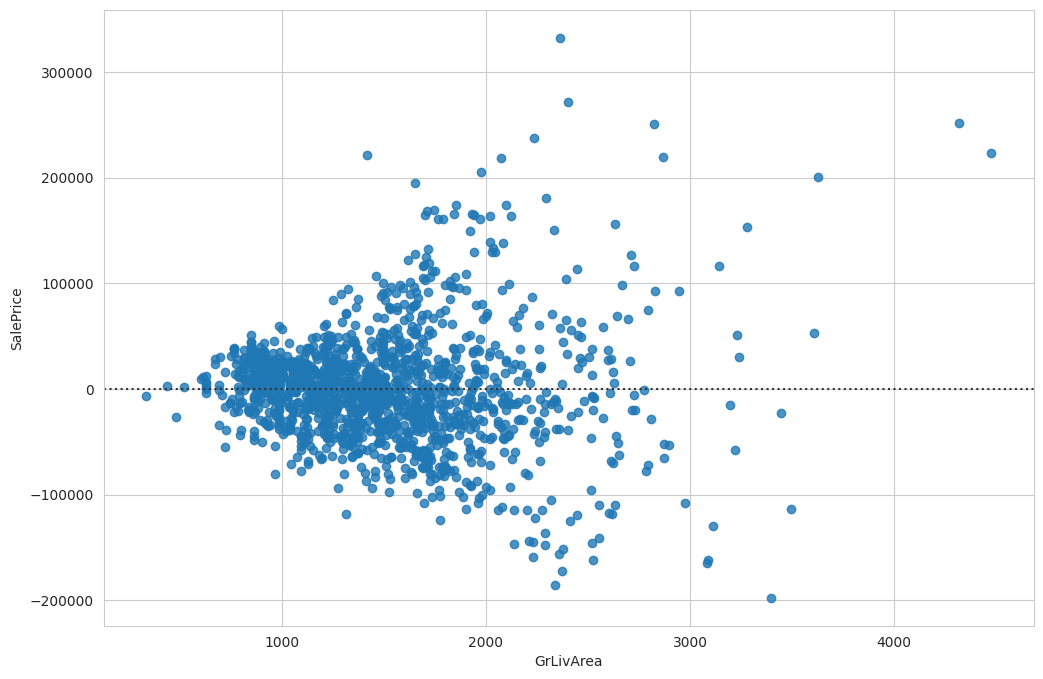

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(x = df['GrLivArea'], y = df['SalePrice'])

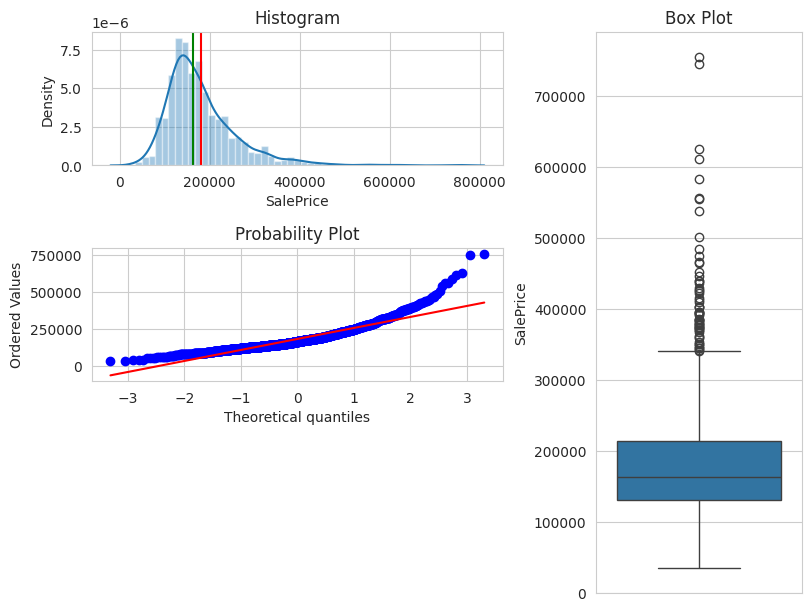

In [ ]:
three_chart_plot(df, 'SalePrice')

In order to make a feature follow normal distribution, we will perform log transformation.

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])
df = train # Update df after log transformation

We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

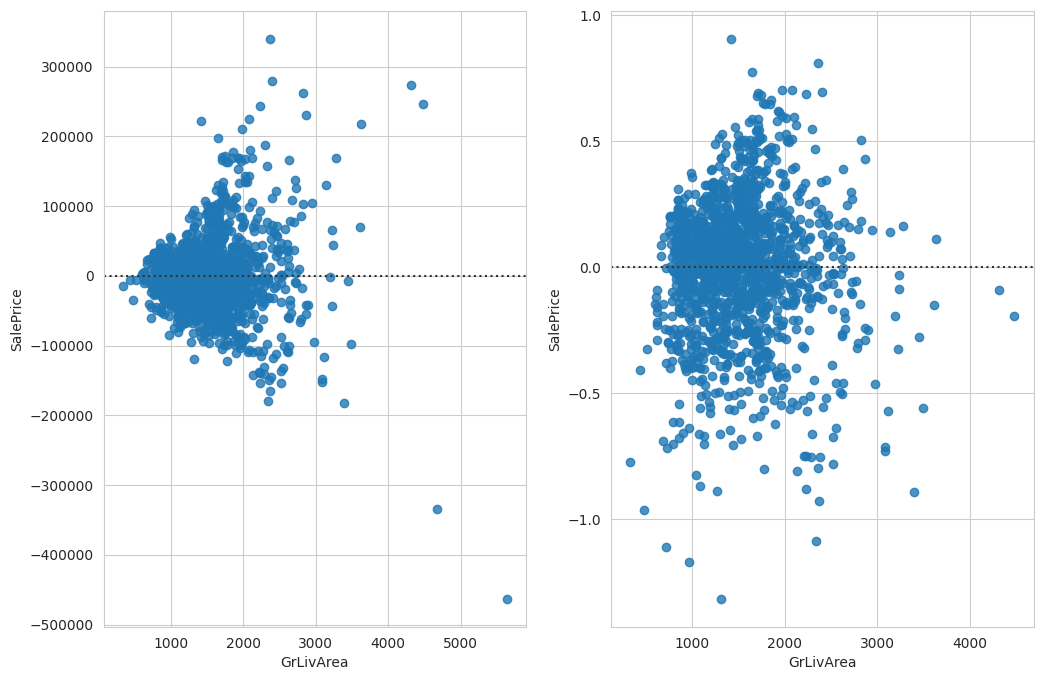

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols = 2, sharex = False, sharey = False)

sns.residplot(x = previous_train['GrLivArea'], y = previous_train['SalePrice'], ax = ax1)
sns.residplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax2)

Suppose that there are two correlated independent variables (A and B) and we are aiming to find the right coefficient for these independent variables. When the coefficient for A is calculated, will that coefficient be accurate? No, it won’t be right because changes in A are associated with shifts in B, and as we have already discussed that all the other variables need to be held constant, B can’t be held as a constant because A and B are correlated. This is known as Multicollinearity and it is one of the disadvantages of Linear Regression.

In order to solve this problem, we use various regularization techniques (l1, l2 etc) or other kind of regression techniuques like Elastic Net Regression, Lasso and Ridge Regression which automatically takes care of multicollinearity.

<Figure size 1200x800 with 0 Axes>

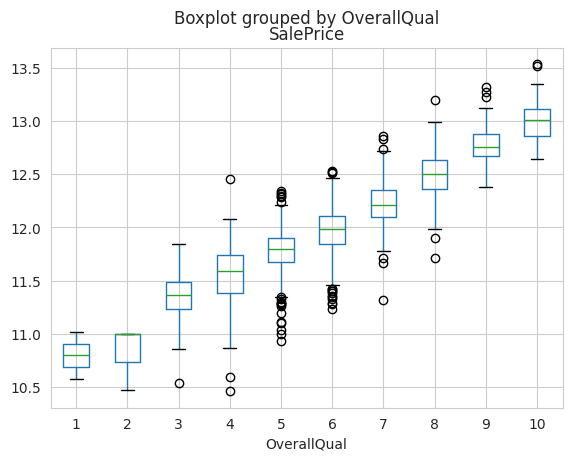

In [ ]:
plt.figure(figsize = (12,8))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()
#As the quality increases, price of the houses also increase

In [ ]:
#Exploring Categorical Variables
def horizontal_plot(data, column_name, color,plot_title):
    """
    A function that plots a horizontal bar graph for the given column name
    """
    fig,  ax = plt.subplots(figsize = (8,6))
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()
    mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], edgecolor = 'black', color = sns.color_palette(color, len(title_cnt)))
    for s in ['top','bottom','left','right']:
      ax.spines[s].set_visible(False)

     # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    #Adding paddings : Padding = distance between axis and numbers
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    #Adding grid lines for x and y axis
    ax.grid(visible = True, color = 'grey', linewidth = 1, linestyle = '-', alpha = 0.3)

    #show top values
    ax.invert_yaxis() #inverts y axis
    #Set title
    ax.set_title(plot_title, weight = 'bold', loc = 'center', pad = 10, fontsize = 10)
    ax.set_xlabel('Count', weight = 'bold') #Provides name to x axis

    for i in ax.patches:
      ax.text(i.get_width()+1.5, i.get_y()+i.get_height()/2, str(round(i.get_width(), 2)), fontsize = 10, fontweight = 'bold', color = 'grey', va = 'center' )

    plt.yticks(weight = 'bold')
    plt.xticks(weight = 'bold')

    plt.show()

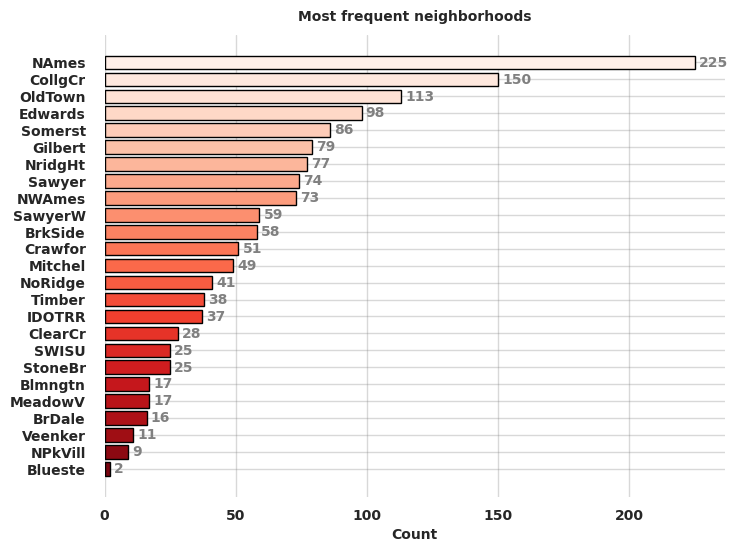

In [ ]:
horizontal_plot(df, 'Neighborhood', 'Reds', 'Most frequent neighborhoods')

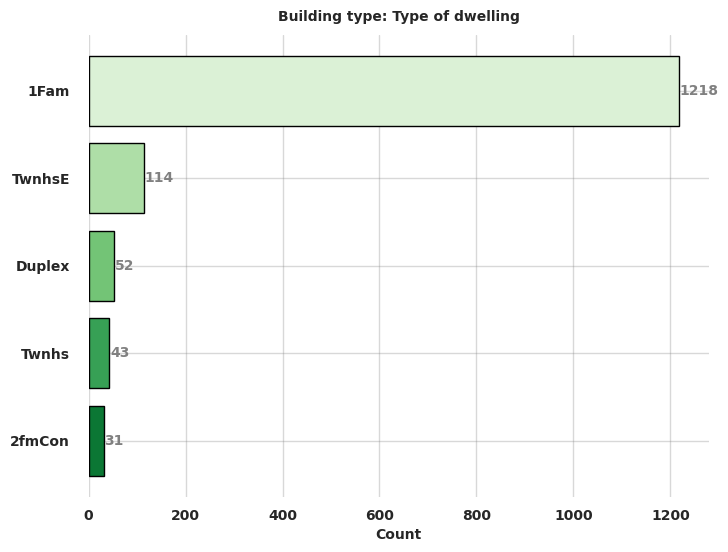

In [ ]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')

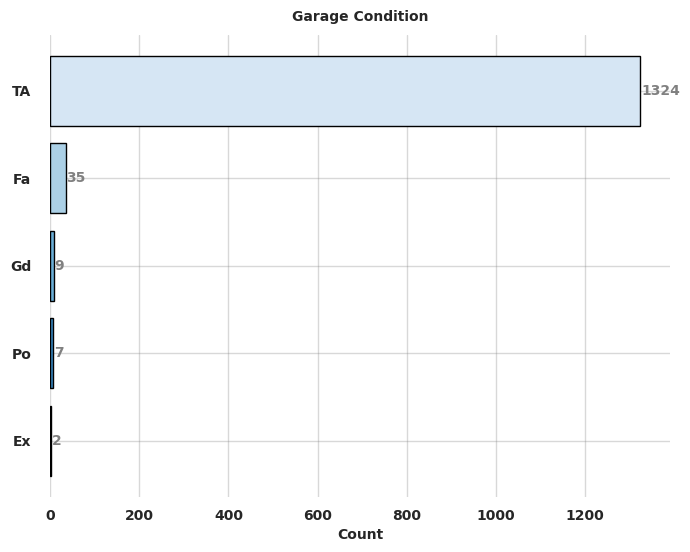

In [ ]:
horizontal_plot(df, 'GarageCond', 'Blues', 'Garage Condition')

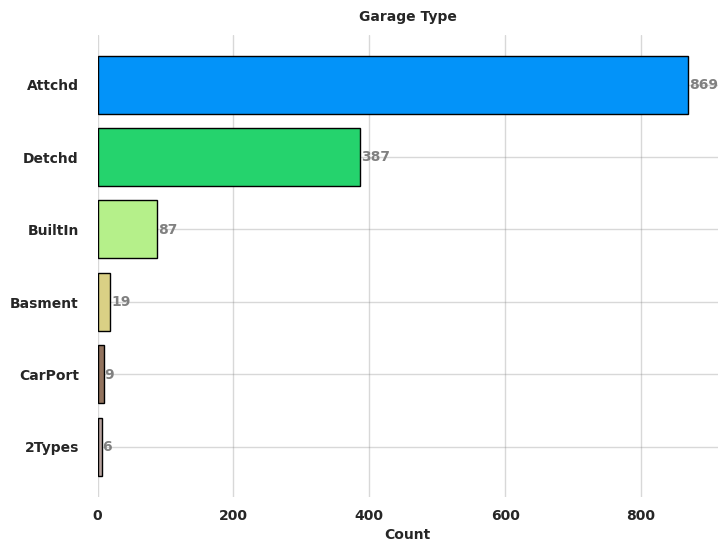

In [ ]:
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')

Most of the houses have Attached Garages and only 19 have Garages in the Basement.

**Feature Engineering**

In [ ]:
#combine train and test features
y = df['SalePrice'].reset_index(drop = True) #reset_index is used to return index from 0,1,2...
train_features = df.drop('SalePrice', axis = 1) #remove the column Saleprice
test_features = test.copy() #separate copy of test dataset

features = pd.concat((train_features,test_features)).reset_index(drop=True) #concatinating as [train row 1, train row 2.......test row 1, test row 2]
features.shape #shape is used to return tuple

(2917, 79)

Some of the variables given in the description should be of string data type but instead they are stored as numerical data type. First let's change them into string data type

In [ ]:
features['MSSubClass'] = features['MSSubClass'].apply(str) #both apply as astype has the same function i.e., converts numericals to text. astype is more stronger than apply function.
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

We have already normalized the target variable in the above section. Let's plot it again

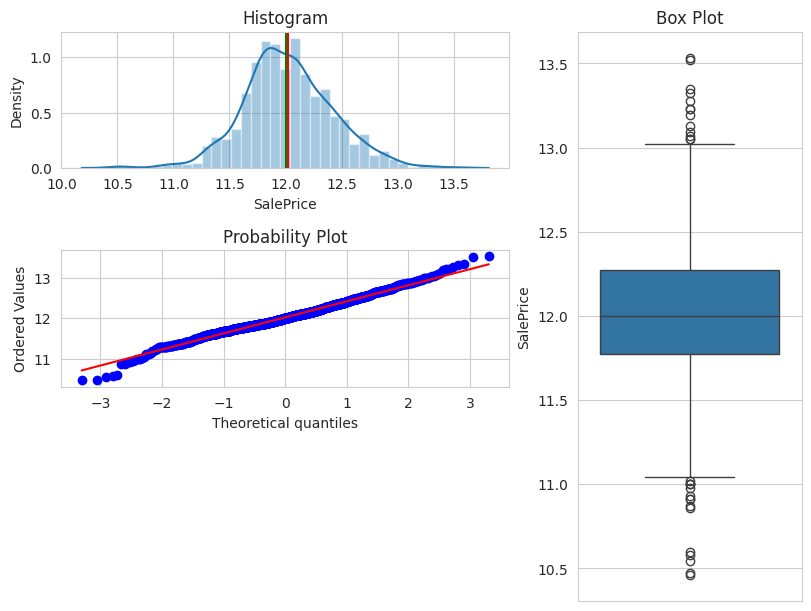

In [ ]:
three_chart_plot(df, 'SalePrice')

Let' see the null values statistics of the combined dataset.

In [ ]:
null_table(features).sort_values(by = 'Percentage of null values').tail(10)

,Columns,Count of null values,Percentage of null values
63,GarageCond,159,5.450806
59,GarageFinish,159,5.450806
62,GarageQual,159,5.450806
2,LotFrontage,486,16.660953
56,FireplaceQu,1420,48.680151
24,MasVnrType,1766,60.541652
72,Fence,2346,80.425094
5,Alley,2719,93.212204
73,MiscFeature,2812,96.400411
71,PoolQC,2908,99.691464


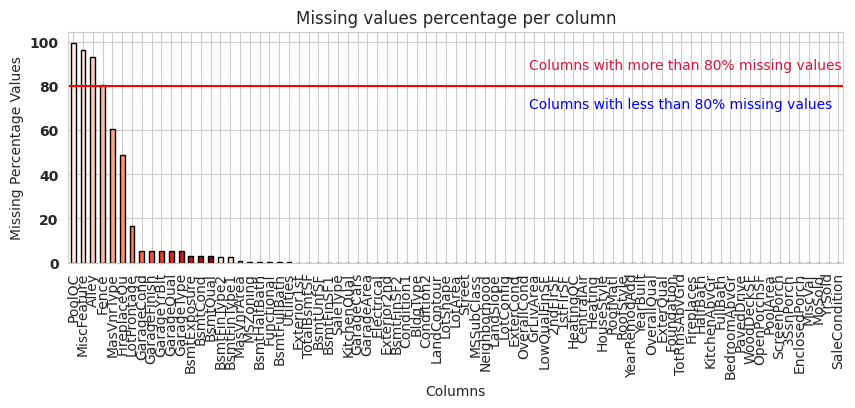

In [ ]:
#This line of code is a visualization command used to create a "Missing Value" plot. It helps you see which parts of your data are "holes" (null values) using a specific color theme.
msv_1(features, 80, color = sns.color_palette('Reds',15))

We can see that there are 4 features having more than 80% missing values. We will drop these 4 features.

In [ ]:
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, errors = 'ignore')
features.shape
#print(features.columns.tolist())

(2917, 75)

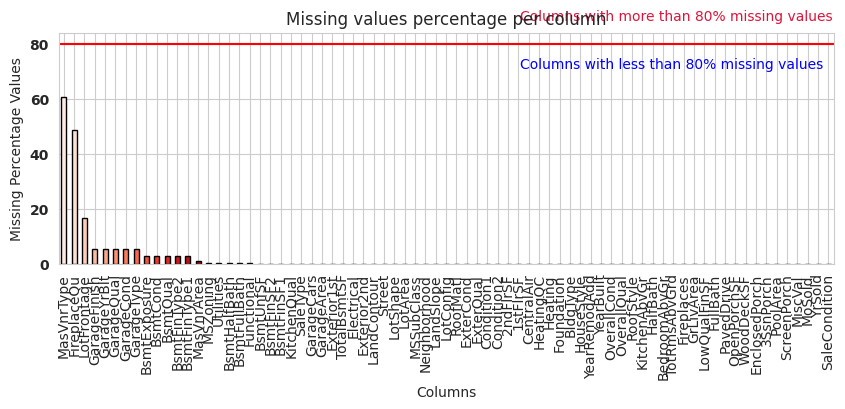

In [ ]:
msv_1(features, 80, color = sns.color_palette('Reds', 15))

Now none of the features have above 80% missing values.

We must observe here that NA has a different meaning. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why wee need to take into account these values as it can affect the final prices of the house.

I have identified some of the features which have NA as a category, they are listed in form of a list below. We will replace these null values with None.

Reading through the description of the features is very important, otherwise the above points can't be concluded.

In [ ]:
description = open("data_description.txt", "r")
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
def filling_null(features):

    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'

  features['Functional'] = features['Functional'].fillna('Typ')

    # Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.

  features['Electrical'] = features['Electrical'].fillna(features['Electrical']. mode()[0])

  features['KitechenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode())

  features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode())

  features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode())

  features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

  # In order to fill the null values for MSZoing, we will take into account the MSSubClass feature.
  # We are doing so because the type of dwelling in a given area largely affects the zone of the area.

  features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

  # In order to fill the null values for LotFrontage(Linear feet of street connected to property)
  # we will fill it with median of the values grouped by Neighborhood.

  features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

  # As mentioned before that the 'NA' value in many columns represent the absence of that feature for a particular house, we will replace those null values with None.
  # 'None' for categorical feature and 0 for numerical feature.

  cat_features = features.select_dtypes(include = 'object').columns
  num_features = features.select_dtypes(exclude = 'object').columns

  features[cat_features] = features[cat_features].fillna('None')
  features[num_features] = features[num_features].fillna(0)

  return features

In [ ]:
features = filling_null(features)
features.shape

(2917, 76)

In [ ]:
features.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Now there are 0 null values in the given dataset

**Feature Creation**

In [ ]:
#converting numeric size/count columns into binary (0/1) indicator features
def new_features(features):

  features['HasPool'] = features['PoolArea'].apply(lambda x:1 if x>0 else 0) #PoolArea is one of the feature of HasPool. Here, when the condition is applied, if the house has pool, it will result in 1 else 0.

  features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x:1 if x>0 else 0)

  features['HasGarage'] = features['GarageArea'].apply(lambda x:1 if x>0 else 0)

  features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x:1 if x>0 else 0)

  features['HasFireplace'] = features['Fireplaces'].apply(lambda x:1 if x>0 else 0)

  # Adding total sqfootage features
  # In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.
  features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

  # Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
  # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.
  features['Total_Bathrooms'] = (features['FullBath']+ (0.5 * features['HalfBath']) + features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

  features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] + features['EnclosedPorch'] + features['ScreenPorch'])

  # Add years since remodel
  features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

  return features

We have added certain features which are quite intuitive and are taken into consideration in real life too while buying the house. Like what's the total area in square feet of the house or how many bathrooms are there in the house. We could also look for the availability of swimming pool, garage, fireplace and basement in the house. That's why I have added such features in the dataset.

In [ ]:
features = new_features(features)
features.shape

(2917, 85)

Let's analyse the skewness of the numerical features.

In [ ]:
num_cols = features.select_dtypes(exclude = 'object').columns
skewed_features = features[num_cols].apply(lambda x: x.skew()).sort_values(ascending = False)
skew_features = pd.DataFrame({'Skew Value': skewed_features})
skew_features.head(10)

,Skew Value
MiscVal,21.950962
PoolArea,17.697766
HasPool,15.502729
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131


There's quite a lot of asymmetry in the above features. We will need to fix the skewness

In [ ]:
def fix_skew(features):
  from scipy.special import boxcox1p
  from scipy.stats import boxcox_normmax
  import numpy as np

  num_cols = features.select_dtypes(exclude = 'object').columns

  # Columns that should NOT be Box-Cox transformed:
  # Binary features
  binary_flags = ['HasPool', 'Has2ndFloor', 'HasGarage', 'HasBsmt', 'HasFireplace']
  # Year-related features (better treated as-is or through other transformations like age)
  year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YearsSinceRemodel']

  # Combine all columns to exclude from Box-Cox transformation
  exclude_from_skew_transform = list(set(binary_flags + year_features))

  skewed_features_series = features[num_cols].apply(lambda x : x.skew()).sort_values(ascending = False)

  # Filter for highly skewed features based on the threshold (e.g., abs(skewness)>0.5)
  # and exclude the identified non-transformable columns
  high_skew_columns = [col for col in skewed_features_series.index if abs(skewed_features_series[col]) > 0.5 and col not in exclude_from_skew_transform]

  # Perform the Box-Cox transformation for selected highly skewed features
  for column in high_skew_columns:
    # Box-Cox requires positive data (or x+1 > 0 for boxcox1p) and non-constant data
    if features[column].nunique() > 1 and (features[column] >= 0).all():
        try:
            # Use boxcox_normmax(features[column]+1) as lambda calculation,
            # and then apply boxcox1p which already handles x+1 and different lambda values.
            transformed_data = boxcox1p(features[column], boxcox_normmax(features[column] + 1))

            # Check for invalid values (NaN, inf) after transformation
            if np.any(np.isinf(transformed_data)) or np.any(np.isnan(transformed_data)):
                print(f"Warning: Transformation for column '{column}' resulted in NaN or inf. Skipping transformation for this column.")
            else:
                features[column] = transformed_data
        except (ValueError, RuntimeError) as e:
            print(f"Skipping transformation for column '{column}' due to error: {e}")
    else:
        print(f"Skipping transformation for column '{column}' (not positive, no variance, or already excluded).")

  # Ensure no inf values remain in any numerical column, replacing with NaN if found.
  # XGBoost can handle NaNs as missing values with 'missing=np.nan' (which is default).
  for col in num_cols:
      if np.any(np.isinf(features[col])):
          features[col] = features[col].replace([np.inf, -np.inf], np.nan)
          print(f"Replaced inf values in column '{col}' with NaN.")

  return features

In [ ]:
features = fix_skew(features)
features.head()

Skipping transformation for column 'LotArea' due to error: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
Skipping transformation for column '1stFlrSF' due to error: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitechenQual,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,60,RL,18.144574,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,0,1,1,1,0,35.576162,3.5,12.339283,5
1,20,RL,20.673626,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,0,0,1,1,1,35.371896,2.5,0.000000,31
2,60,RL,18.668047,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Gd,0,1,1,1,1,36.241082,3.5,10.090749,6
3,70,RL,17.249651,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gd,0,1,1,1,1,35.120733,2.0,28.165645,36
4,60,RL,21.314284,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Gd,0,1,1,1,1,39.002328,3.5,14.606323,8


In [ ]:
features = pd.get_dummies(features).reset_index(drop=True) #get_dummies helps convert the text in each column to 0s and 1s the computer can understand.
features.shape #returns the dimensions

(2917, 332)

Below separates your big features table back into the two original groups: the Training set (used to teach the model) and the Test set (the houses you need to predict prices for)

In [ ]:
x = features.iloc[:len(y), : ] #len(y): Since only the training houses have a Sale Price, the number of entries in y tells you exactly where the training data ends.
test = features.iloc[len(y):, : ]

In [ ]:
x.shape, test.shape, y.shape

((1458, 332), (1459, 332), (1458,))

**Training and Testing Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split
# Corrected variable assignment: X for features, y for target
X_train, X_test, y_train_target, y_test_target = train_test_split(x, y ,test_size = 0.25,random_state = 0)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def evaluation(regressor, X_data, y_true, is_train):
  # Renamed parameters for clarity:
  # regressor: the model object (e.g., ls, ridge, xgb_regress)
  # X_data: features for prediction (e.g., X_train, X_test)
  # y_true: true target values (e.g., y_train_target, y_test_target)
  # is_train: boolean flag to indicate if it's for training or test set evaluation

  pred = regressor.predict(X_data) # Use the passed regressor to predict

  if is_train:
    print("Train Result:\n================================================")
    print(f"Root mean squared error : {np.sqrt(mean_squared_error(y_true, pred))}")
    print(f"Mean squared error : {mean_squared_error(y_true, pred)}")
    print(f"Mean absolute error : {mean_absolute_error(y_true, pred)}")
    print("_______________________________________________")
  else: # for test data
    print("Test Result:\n================================================") # Changed "Train Result" to "Test Result"
    print(f"Root mean squared error : {np.sqrt(mean_squared_error(y_true, pred))}")
    print(f"Mean squared error : {mean_squared_error(y_true, pred)}")
    print(f"Mean absolute error : {mean_absolute_error(y_true, pred)}")
    print("_______________________________________________")

**Lasso Regression Model**

In [ ]:
from sklearn.linear_model import Lasso #Lasso is a "smart" version of Linear Regression. Lasso controls Regularization; Selects the best feature

ls = Lasso(alpha = 0.1) #The "Alpha": This is the most important part of Lasso. It controls Regularization
# Use the correctly assigned training features and target
ls.fit(X_train, y_train_target)

# Call the improved evaluation function with the correct variables
# Now that evaluation function is updated to take the model object as the first argument
evaluation(ls, X_train, y_train_target, True)
evaluation(ls, X_test, y_test_target, False)

Train Result:
Root mean squared error : 0.15806176037604297
Mean squared error : 0.02498352009317363
Mean absolute error : 0.11067326272662763
_______________________________________________
Test Result:
Root mean squared error : 0.1487205096424287
Mean squared error : 0.02211778998830373
Mean absolute error : 0.10822473656728347
_______________________________________________


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge #Handles multicollinearity., Ridge keeps all features but shrinks their importance so that no single feature dominates the model.

ridge = Ridge(alpha = 0.1)
# Use the correctly assigned training features and target
ridge.fit(X_train, y_train_target)

# Call the improved evaluation function with the correct variables
evaluation(ridge, X_train, y_train_target, True)
evaluation(ridge, X_test, y_test_target, False)

Train Result:
Root mean squared error : 0.0866505370051176
Mean squared error : 0.007508315563275254
Mean absolute error : 0.0605011151668074
_______________________________________________
Test Result:
Root mean squared error : 0.11714921834331764
Mean squared error : 0.01372393935845031
Mean absolute error : 0.08410657835852721
_______________________________________________


**XGB Regressor**

In [ ]:
import xgboost as xgb #Non-Linear powerhouse

xgb_regress = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1)
xgb_regress.fit(X_train, y_train_target)

evaluation(xgb_regress, X_train, y_train_target, True)
evaluation(xgb_regress, X_test, y_test_target, False)

Train Result:
Root mean squared error : 0.026095781002381677
Mean squared error : 0.0006809897861242644
Mean absolute error : 0.018639193411979487
_______________________________________________
Test Result:
Root mean squared error : 0.12315297093269181
Mean squared error : 0.015166654249548436
Mean absolute error : 0.09126418896575908
_______________________________________________


**Submission**

In [ ]:
test_pred = ridge.predict(test) #using ridge method to test saleprices of test dataset
submission = pd.DataFrame({'ID': test_id}) # Correctly assign test_id to the 'ID' column
test_pred = np.expm1(test_pred) #expm1 =  exponent - 1 ; converts log to dollar value
submission['SalePrice'] = test_pred #adds a new column SalePrice to submission dataframe
submission.head()

,ID,SalePrice
0,1461,114688.596748
1,1462,160748.637971
2,1463,187007.912430
3,1464,201916.255154
4,1465,209215.706497
